In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the data
df = pd.read_csv('CSV_files/train.csv')

In [3]:
#Overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Missing values
missing_values = ['LotFrontage','Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure',
                  'BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish',
                 'GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [5]:
# Cleaning LotFrontage

#df[df['LotFrontage'].isna()==True]

#There is no high corrleation to to relate with another column
#Hence mean is used to subsitute all NaN values
df['LotFrontage'] = df['LotFrontage'].replace(np.nan,df['LotFrontage'].mean())

#LotFrontage cleaning complete

In [6]:
# Cleaning Alley

df['Alley'] = df['Alley'].replace(np.nan,'No alley')
#df['Alley'].unique()

# Alley cleaning complete

In [7]:
# Cleaning MasVnrType

df['MasVnrType'].value_counts()
# None is the most suitable option and is therefore being filled in the NaN values
df['MasVnrType'] = df['MasVnrType'].replace(np.nan,'None')

# MasVnrType cleaning complete

In [8]:
# Cleaning MasVnrArea

# As MasVnrType was filled as none for Nan values the value for these NaN values will be 0.
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan,0)

# MasVnrArea cleaning complete

In [9]:
# Cleaning Bsmt

# As per the meaning
df['BsmtQual'] = df['BsmtQual'].replace(np.nan,'No basement')
df['BsmtCond'] = df['BsmtCond'].replace(np.nan,'No basement')
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan,'No basement')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan,'No basement')
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan,'No basement')

# Bsmt cleaning complete

In [10]:
# Cleaning FireplaceQu

df['FireplaceQu'] = df['FireplaceQu'].replace(np.nan,'No fireplace')

# FireplaceQu cleaning complete

In [11]:
# Cleaning Garage

df['GarageType'] = df['GarageType'].replace(np.nan,'No garage')
df['GarageYrBlt'] = df['GarageYrBlt'].replace(np.nan,0)
df['GarageFinish'] = df['GarageFinish'].replace(np.nan,'No garage')
df['GarageQual'] = df['GarageQual'].replace(np.nan,'No garage')
df['GarageCond'] = df['GarageCond'].replace(np.nan,'No garage')

# Garage cleaning complete

In [12]:
# Cleaning Electrical

df['Electrical'].value_counts()

# As maximum are SBrkr and only one value is missing we will replace it with SBrkr
df['Electrical'] = df['Electrical'].replace(np.nan,'SBrkr')

# Electrical cleaning complete

In [13]:
# Cleaning PoolQC,Fence,MiscFeature

df['PoolQC'] = df['PoolQC'].replace(np.nan,'No pool')
df['Fence'] = df['Fence'].replace(np.nan,'No fence')
df['MiscFeature'] = df['MiscFeature'].replace(np.nan,'No misc')

# PoolQC,Fence,MiscFeature cleaning done

In [14]:
# Saving the cleaning file

#df.to_csv('CSV_files/House_pricing_cleaned.csv',index=False)

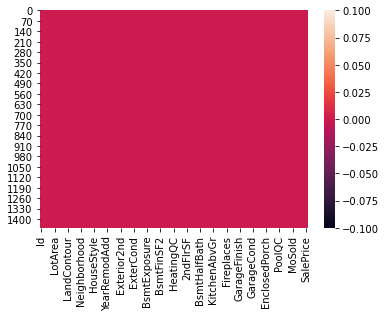

In [15]:
# Checking visually
sns.heatmap(df.isna())
# No null values!